In [5]:
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
import os
from tqdm import tqdm
from joblib import Parallel, delayed
import shutil
import rasterio as rio

In [62]:
data_directory = "/data/crowdai"
annotation_file_template = "{}/{}/annotation{}.json"

TRAIN_IMAGES_DIRECTORY = "/data/crowdai/train/3band"
TRAIN_ANNOTATIONS_PATH = "/data/crowdai/train/annotation.json"
TRAIN_ANNOTATIONS_SMALL_PATH = "/data/crowdai/train/annotation-small.json"

VAL_IMAGES_DIRECTORY = "/data/crowdai/val/3band"
VAL_ANNOTATIONS_PATH = "/data/crowdai/val/annotation.json"
VAL_ANNOTATIONS_SMALL_PATH = "/data/crowdai/val/annotation-small.json"

In [63]:
img = io.imread('/data/crowdai/train/3band/000000245651.jpg')
mask = np.load('/data/crowdai/train/masks/000000245651.npy')

In [64]:
img.max()

255

In [14]:
np.expand_dims(mask, axis=2).shape

(300, 300, 1)

In [1]:
import pathlib
path = "/data/crowdai/val/3band/"
val_img_list= list(pathlib.Path(path).iterdir())
path = "/data/crowdai/train/3band/"
train_img_list= list(pathlib.Path(path).iterdir())

In [2]:
import random
random_val_move = random.sample(range(len(val_img_list)), len(val_img_list)-3500)

In [3]:
len(random_val_move)

56817

In [7]:
val_mask_root = '/data/crowdai/val/masks/'
train_mask_root = '/data/crowdai/train/masks/'
train_img_root = '/data/crowdai/train/3band/'

for i in random_val_move:
    val_img_path = val_img_list[i]
    img_name = str(val_img_path).split('/')[-1].split('.')[0] + 'v.jpg'
    val_mask_path = os.path.join(val_mask_root, str(val_img_path).split('/')[-1].split('.')[0] + '.npy')
    train_mask_path = os.path.join(train_mask_root, str(val_img_path).split('/')[-1].split('.')[0] + 'v.npy')
    train_img_path = os.path.join(train_img_root, img_name)
    #if os.path.isfile(val_img_path):
    #    shutil.move(val_img_path, train_img_path)
    #    shutil.move(val_mask_path, train_mask_path)


In [6]:
test_img_c = io.imread('/data/crowdai/train/3band/000000033920v.jpg')
test_img_s = rio.open('/data/spacenet/AOI_2_Vegas/train/3band/RGB-PanSharpen_AOI_2_Vegas_img1007.tif').read([1,2,3])

In [4]:
test_img_c.max()

255

(array([  485., 20056., 64001., 74433., 59708., 27514., 16419.,  4949.,
         1140.,  1295.]),
 array([0.        , 0.09960938, 0.19921875, 0.29882812, 0.3984375 ,
        0.49804688, 0.59765625, 0.69726562, 0.796875  , 0.89648438,
        0.99609375]),
 <BarContainer object of 10 artists>)

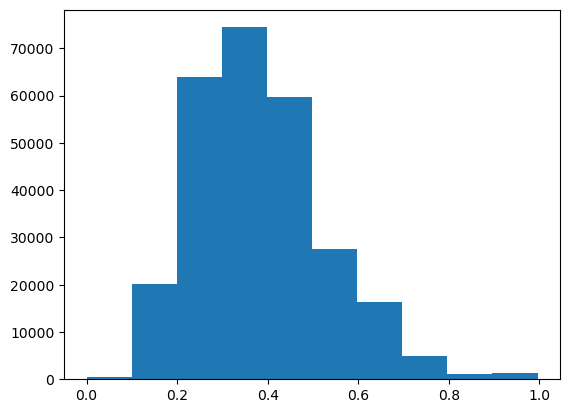

In [21]:
plt.hist(test_img_c.flatten()/2**8)

In [10]:
test_img_s.max()

1772

(array([3.29440e+04, 3.94198e+05, 5.08457e+05, 2.19377e+05, 8.76970e+04,
        1.71200e+04, 4.33500e+03, 1.85000e+03, 1.01900e+03, 5.03000e+02]),
 array([5.64334086e-04, 1.00507901e-01, 2.00451467e-01, 3.00395034e-01,
        4.00338600e-01, 5.00282167e-01, 6.00225734e-01, 7.00169300e-01,
        8.00112867e-01, 9.00056433e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

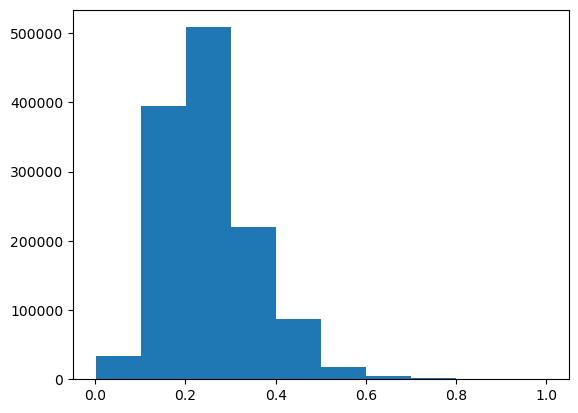

In [22]:
plt.hist(test_img_s.flatten()/1772)